# Question 5 (Homework 3)

For this question, you will write an implementation of the logistic regression model with maximum likelihood approach using the gradient descent algorithm. The dataset for this question corresponds to the autism screening data created by Dr Fadi Fayez Thabtah using a mobile app called ASDTests (ASDtests.com). Your task is to train a logistic regression model to classify the toddlers based on their various predictor attributes. You will need to train your model on a given training set and report its classification performance on a separate test set.

The code must be written using only the built-in functions in standard python as well as functions provided by the numpy and pandas libraries. You may also use the train_test_split() function in scikit-learn for this homework. All other functions in the scikit-learn library or other libraries are prohibited. If you're unsure whether you can use other functions/libraries, please contact the instructor. 

Follow the step-by-step procedure given in this tempate. Rename the template file to yourlastname.ipynb and submit the Jupyter notebook along with its HTML version (by choosing File -> Download as HTML on the menu option). 

**Step 1: Import Data**

First, you need to download the autism data from D2L. Load the input data into a pandas DataFrame object and display it.

In [ ]:
import pandas as pd

#Load the input data into a pandas DataFrame object 
data = pd.read_csv('/content/sample_data/autism.csv')  

#Display
data

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Months,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class
0,1,0,0,0,0,0,0,1,1,0,1,28,3,1,0,1,0,0
1,2,1,1,0,0,0,1,1,0,0,0,36,4,0,1,1,0,1
2,3,1,0,0,0,0,0,1,1,0,1,36,4,0,0,1,0,1
3,4,1,1,1,1,1,1,1,1,1,1,24,10,0,0,0,0,1
4,5,1,1,0,1,1,1,1,1,1,1,20,9,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,1,1,0,1,0
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,0,0,1,0,1
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,0,0,1,0,1
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,0,1,0,1,0


**Step 2: Data preprocessing** 

You need to perform the following steps to extract the predictor attributes X and target attribute y from the input data.
- Extract y from the last column of the data frame. Convert y from a pandas Series object into a numpy array object.
- Extract X from the remaining columns of the data frame. 
- Drop the column named Case_No
- Normalize the values in the Age_Months and Qchat-10-Score columns so that their values range between 0 and 1 by dividing the values in the columns with their respective maximum value.
- Add a column of 1s to X (this will allow us to define the model intercept/bias).
- Convert X from a pandas DataFrame object into a numpy array object.

*Hint:* You can use .values to convert a pandas Series or DataFrame object into numpy arrays. 

**(a)** Extract the target (class) attribute y from the last column of the dataframe. Show the class distribution. Convert y from a pandas Series object into a numpy array.

In [ ]:
import numpy as np

# extract y & to arrary
y = data['Class'].values
print(y.shape)

(1054,)


In [ ]:
import numpy as np

#Extract y from the last column of the data frame.
y = data.Class

print(y)
#Class distribution
print('Class distribution:')
print(y.value_counts()/len(y))


#Convert y from a pandas Series object into a numpy array object.
y = data.values
print(type(y))

print(y)
print(y.shape)

0       0
1       1
2       1
3       1
4       1
       ..
1049    0
1050    1
1051    1
1052    0
1053    1
Name: Class, Length: 1054, dtype: int64
Class distribution:
1    0.690702
0    0.309298
Name: Class, dtype: float64
<class 'numpy.ndarray'>
[[0. 0. 0. ... 1. 0. 0.]
 [1. 1. 0. ... 1. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 ...
 [1. 0. 1. ... 1. 0. 1.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 1. 0. ... 1. 1. 1.]]
(1054, 17)


**(b)** Extract the predictor attributes X by drop the class and Case_No columns from the dataframe object. Normalize the Age_Months and Qchat-10-Score columns by dividing each value with its respective maximum value. Convert the resulting pandas dataframe object into a numpy array. Print the size of the 2d array and display X to verify its content. 

In [ ]:
import numpy as np

X = data.iloc[:,0:17] #extract class
print(X)

#Extract X from the remaining columns of the data frame and drop the column named Case_No
X = data.drop(['Case_No'], axis=1, inplace=True)

#Normalize the values in the Age_Months and Qchat-10-Score columns by dividing the values with maximum value.
data.Age_Months = data.Age_Months / data.Age_Months.max()
#print(data.head())

data = data.rename(columns={'Qchat-10-Score': 'Quant10Score'})
data.Quant10Score = data.Quant10Score / data.Quant10Score.max()
#print(data.head())

#Add a column of 1s to X
#np.hstack((X,np.ones([X.shape[0],1], X.dtype)))

#Convert X from a pandas DataFrame object into a numpy array object.
X = data.values
print(type(X))


print(X)

print('Shape of 2d-array, X =', X.shape)


X
#

      Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Months  \
0           1   0   0   0   0   0   0   1   1   0    1          28   
1           2   1   1   0   0   0   1   1   0   0    0          36   
2           3   1   0   0   0   0   0   1   1   0    1          36   
3           4   1   1   1   1   1   1   1   1   1    1          24   
4           5   1   1   0   1   1   1   1   1   1    1          20   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...         ...   
1049     1050   0   0   0   0   0   0   0   0   0    1          24   
1050     1051   0   0   1   1   1   0   1   0   1    0          12   
1051     1052   1   0   1   1   1   1   1   1   1    1          18   
1052     1053   1   0   0   0   0   0   0   1   0    1          19   
1053     1054   1   1   0   0   1   1   0   1   1    0          24   

      Qchat-10-Score  Sex  Ethnicity  Jaundice  Family_mem_with_ASD  
0                  3    1          0         1                    0  
1                  

array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 0., 1., ..., 1., 0., 1.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 1., 0., ..., 1., 1., 1.]])

**Step 3: Training and Test Set Creation**

Divide the data into a separate training and test set. You may use the scikit-learn train_test_split function to do this. You need to reserve 67% of the data for training and the remaining 33% for testing. Make sure you set the random_state parameter to 1 to ensure reproducibility of your result.

In [ ]:
print(X.shape, y.shape)

(1054, 17) (1054,)


In [ ]:
from sklearn.model_selection import train_test_split
#np.hstack((X,np.ones([X.shape[0],1], X.dtype)))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=1)

print('Training set: X.shape = ', X_train.shape, ' y.shape = ', y_train.shape )
print('Test set: X.shape = ', X_test.shape, ' y.shape = ', y_test.shape )

Training set: X.shape =  (702, 17)  y.shape =  (702,)
Test set: X.shape =  (352, 17)  y.shape =  (352,)


**Step 4: Logistic Regression Model**

Write an implementation of a class named LogisticRegr that implements the logistic regression classifier. There are 2 functions that must be implemented in this class: (1) a fit() function to fit the classifier to the given input data using gradient descent algorithm, and (2) a predict() function to apply the classifier to the test data. 

During training, the logistic regression classifier should implement the gradient descent algorithm by minimizing the following negative loglikehood function:
$$\mathcal{L} = \sum_{i=1}^N \bigg[ y_i \log\bigg(1 + e^{-\mathbf{w}^T \mathbf{x}_i - w_0}\bigg )  + (1 - y_i) \log\bigg(1 + e^{\mathbf{w}^T\mathbf{x}_i + w_0}\bigg) \bigg]$$
where $N$ is the size of the training data, $w_0$ is the model intercept, and $\mathbf{w}$ is the vector of model coefficients. Both the model intercept and coefficients must be initialized to 0 and vector of zeros, respectively, before performing the gradient descent. You must compute the training loss at every iteration and store them in an array named loss. The training loss will be returned by the fit() function, which you can use to plot the convergence of the algorithm.

Create a class named LogisticRegr for the logistic regression model. The model contains 2 functions:
- fit(): this function will estimate the parameters of the generalized linear model using the maximum likelihood approach with gradient descent algorithm. The pseudocode of the gradient descent algorithm is as follows:

    - w = [0,0,...,0]
    - for i = 1 to maxiter do
        - Update the weight: $\mathbf{w} \leftarrow \mathbf{w} - \frac{\alpha}{N} \nabla \mathcal{L}$ (where $\alpha$ is the learning rate) 
    - end

- predict(): this function will apply the generalized linear model to predict the values of the target attribute given some test data, where the predicted class probability for each test instance $\mathbf{x}_i$ is $$P(y_{i, pred} = 1 | \mathbf{x}_i) = \sigma(\mathbf{x}_i) = \frac{1}{1 + \exp[-\mathbf{w}^T\mathbf{x}_i - w_0]}$$
The function will assign the test instance to the larger class, e.g., class 1 if $P(y_{i,pred} = 1 | \mathbf{x}_i) > P(y_{i,pred} = 0 | \mathbf{x}_i)$. The function should return both the predicted class as well as the predicted class probabilities.

In [ ]:
import numpy as np
import math

class LogisticRegr():
    """
    Implementation of logistic regression classifier.
    
    """
    def __init__(self):
        self.w = np.zeros(17)

    def fit(self, X, y, maxiter = 100, learning_rate = 0.01):
        """"
            Input:  
                X: N x d matrix of predictor attributes, where N is #training points and d is #predictor attributes
                y: N x 1 vector of target attributes, where each value in the vector is either 0 or 1.
                maxiter: maximum iteration before the gradient/subgradient descent algorithm terminates (default=100).
                learning_rate: learning rate for gradient/subgradient descent (default = 0.01).

            Output: 
                loss: maxiter x 1 vector containing value of the loss function in each iteration
        """    
        n = len(X)
        loss = []
        wt = self.wt

        for i in range(1, maxiter):
            d, l = 0,0
            for j in range(0, n):
                sigma = 1/(1 + math.e**(-np.dot(wt.T,X[j])))
                N = -((y[j] / sigma) - ((1 - y[j])/(1 - sigma)))
                d += N * (sigma * (1 - sigma) * X[j])
                l = l + y[j] * math.log(1 + math.e**(-np.dot(wt.T,X[j]))) + (1 - y[j]) * math.log(1 + math.e**(np.dot(wt.T,X[j])))
            loss.append(l)
            wt = wt - (learning_rate / n) * d
        self.wt = wt

        return loss
                
    def predict(self, X):
        """"
            Input:  
                X: N x d matrix of predictor attributes, where N is #data points and d is #predictor attributes

            Output: 
                Y_pred: N x 1 vector containing the predicted class of each data point (either 0 or 1)
                Y_probs: N x 2 vector containing posterior probabilities of each data point in each of the 2 classes,
                         where Y_probs[:,0] = P(y=0|x) and Y_probs[:,1] = P(y=1|x). 
        """    
        n = len(X)
        Y_pred = []
        Y_probs = [[],[]]
        w = self.w

        for k in range(0,n):
            a = 1/(1 + math.e**(-np.dot(w.T,X[k])))
            b = 1 - a
            Y_probs[0].append(a)
            Y_probs[1].append(b)
            if (b > a):
                Y_pred.append(1)
            else:
                Y_pred.append(0)

        return (Y_pred, Y_probs)

**(a)** Train the logistic regression on the training data by invoking the fit() function with maxiter = 1000. Plot the resulting loss for each iteration to show convergence of the gradient descent algorithm. Make sure you display the model coefficients, including its intercept term.

Model coefficients: [ 0.3612804   0.20266443  0.31905505  0.34997182  0.34912834  0.31314045
  0.24677765  0.45043439 -0.12771301 -0.53079407  0.27591738 -0.37254931
 -0.10771429 -0.07328131 -0.11162494  0.9551069 ]
Model intercept: 0.2944342679924085


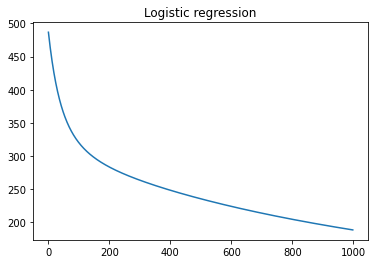

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

model = LogisticRegr()
losses = model.fit(X_train, y_train, maxiter=1000)

plt.plot(losses)
plt.title('Logistic regression')
print('Model coefficients:', model.w[1:])
print('Model intercept:', model.w[0])

**(b)** Apply the trained model separately to both the training and test data. Report the accuracy and confusion matrix obtained. You may use scikit-learn library functions for confusion_matrix and accuracy_score for this step.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
%matplotlib inline

model = LogisticRegr()
losses = model.fit(X_train, y_train, maxiter=1000)

(ytrain_pred, probs) = model.predict(X_train)
(ytest_pred, probs) = model.predict(X_test)

print('Model performance on training set:')
print('Accuracy:', accuracy_score(y_train, ytrain_pred))
print('Confusion matrix:')
print(confusion_matrix(y_train, ytrain_pred))

print('\nModel performance on test set:')
print('Accuracy:', accuracy_score(y_test, ytest_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, ytest_pred))

Model performance on training set:
Accuracy: 0.8931623931623932
Confusion matrix:
[[157  75]
 [  0 470]]

Model performance on test set:
Accuracy: 0.9204545454545454
Confusion matrix:
[[ 66  28]
 [  0 258]]
